Сегодня в программе:
* файловые дескрипторы
* пишем на питоне правильно
* все, что выхотели знать о функциях
* scopes
* name resolution

# File descriptors

В Unix всё - файл

Every I/O operation uses a file descriptor

To the kernel, all open files are referred to by File Descriptors. A file descriptor is a non-negative number.

* Regular files
* Directories
* Character device files -> descriptor
* Block device files
* Local domain sockets
* Named pipes (FIFOs) and
* Symbolic links

Использую файловые дескрипторы в:

1. Чтение и запись файлов
2. Директории
3. Девайсы
4. Коммуникация между процессами
5. Сетевая коммуникация
6. I/O multiplexing
7. Мониторинг файловой системы
8. ...

Каждый процесс при создании получает три дескриптора.

Стандартные числа

0 - standard input

1 - standard output

2 - standard error output


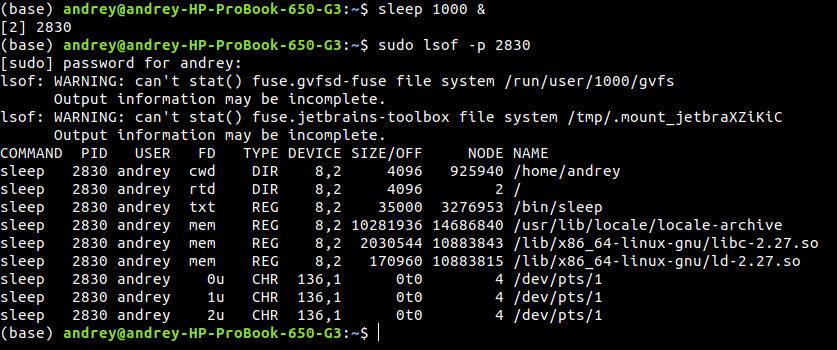
Некоторые значения FD:
* cwd – Current Working Directory
* txt – Text file
* mem – Memory mapped file
* mmap – Memory mapped device

Но: Только число является настоящим файловым дескриптором. 

`/dev/pts/1` - in-memory object

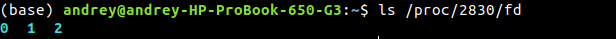

### Можем использовать дескриптор как ссылку на файл
когда он уже открыт

In [4]:
import os

with open("test.txt", "w") as f:
    stat = os.stat(f.fileno())
    print(stat)
    print(f.fileno())
    
    os.chmod(f.fileno(), 777) 

os.stat_result(st_mode=33188, st_ino=1338928, st_dev=2050, st_nlink=1, st_uid=1000, st_gid=1000, st_size=0, st_atime=1573300651, st_mtime=1573300651, st_ctime=1573300651)
45


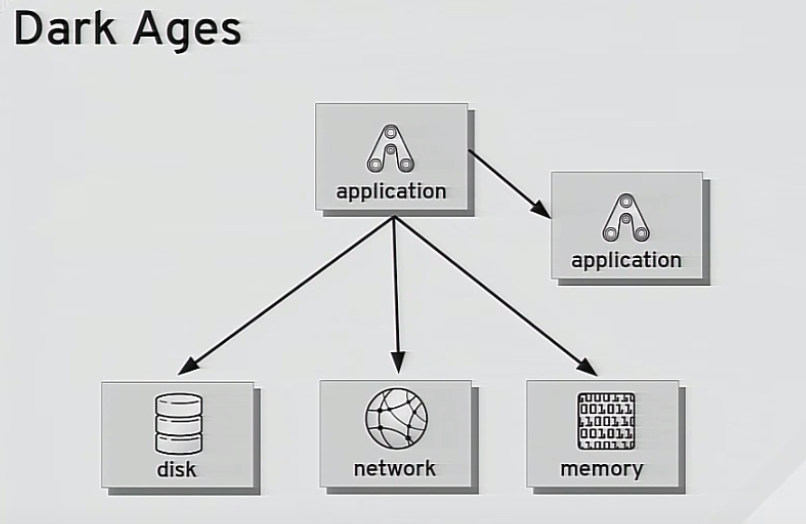

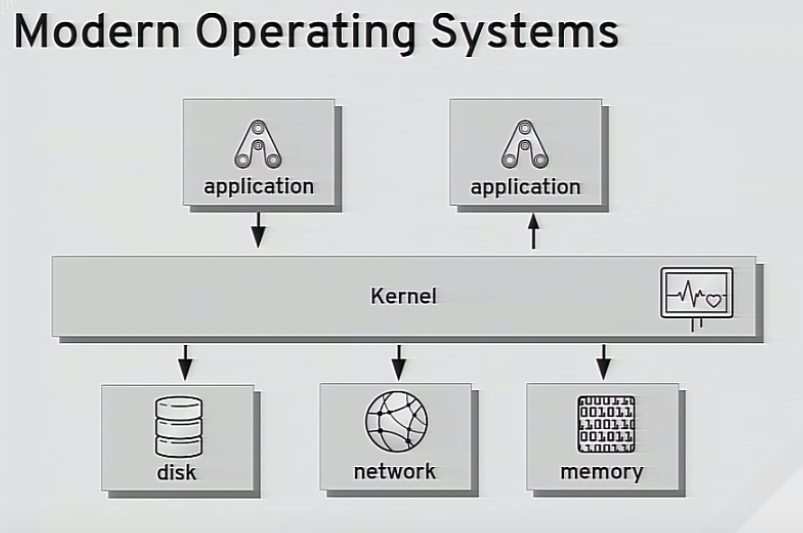

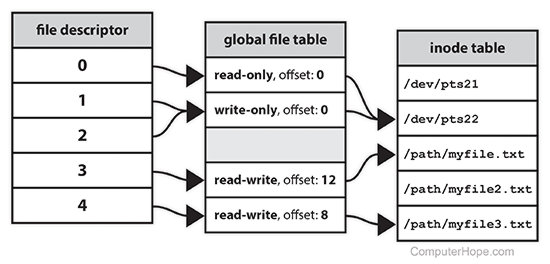

## Немного о правилах хорошего тона

#### __Truthy__ and __Falsy__ values

refer to values which are evaluated to True or False

In [1]:
print(bool([]))

print(bool([1]))

print(bool(0))

print(bool(''))

print(bool(b''))

print(bool('hello'))

False
True
False
False
False
True


__Falsy__ - None, False, 0, 0.0, 0j, пустые строки/байты, пустые коллекции.

### Используйте эту семантику для проверки коллекции на пустоту

In [2]:
smth = []

# плохо
if smth == []:
    ...
if len(smth) != 0:
    ...

    
# лучше
if not smth:
    ...


some_counter = 0
# Плохо
if some_counter == 0:
    ...

### А какие еще membership operators существуют в Python?

__in__	

Evaluates to true if it finds a variable in the specified sequence and false otherwise. 

`x in y` - here in results in a 1 if x is a member of sequence y.

__not in__	

Evaluates to true if it does not finds a variable in the specified sequence and false otherwise. 	

`x not in y` -  here not in results in a 1 if x is not a member of sequence y.

Используй операторы `is` и `is not` только для сравнение с синглтонами, например, `None`. Исключение: булевые значения `True` и `False`.

#### Не используйте __dict.get__ и коллекцию __dict.keys__ для проверки наличия ключа в словаре:

In [6]:
pocket = {}

# Плохо
if 'key' in pocket.keys():
    ...

if not pocket.get('key', False):
    ...

# Лучше
if 'key' in pocket:
    ...

if 'key' not in pocket:
    ...

#### Не копируйте без необходимости

In [ ]:
# Плохо
set([x**2 for x in range(42)])

for x in list(sorted(xs)):
    ...

# Лучше
{x**2 for x in range(42)}

for x in sorted(xs):
    ...

#### Используйте литералы для создания пустых коллекций. Исключение: set, литералов пустого множества в Python нет.

In [7]:
# Плохо
dict(), list(), tuple()

# Лучше
{}, [], ()

({}, [], ())

### Все дело в скорости..

In [12]:
from timeit import timeit as tm

print(tm("d = dict()", number=10000))
print(tm("d = {}", number=10000))

0.0068088089992670575
0.0011552649993973318


In [7]:
from dis import dis

dis('d = {1,2,3}')

  1           0 LOAD_CONST               0 (1)
              2 LOAD_CONST               1 (2)
              4 LOAD_CONST               2 (3)
              6 BUILD_SET                3
              8 STORE_NAME               0 (d)
             10 LOAD_CONST               3 (None)
             12 RETURN_VALUE


In [8]:
dis('d = set(1,2,3)')

  1           0 LOAD_NAME                0 (set)
              2 LOAD_CONST               0 (1)
              4 LOAD_CONST               1 (2)
              6 LOAD_CONST               2 (3)
              8 CALL_FUNCTION            3
             10 STORE_NAME               1 (d)
             12 LOAD_CONST               3 (None)
             14 RETURN_VALUE


### Не эмулируйте оператор for. тут вам не Scala

In [14]:
# Плохо
i = 0
n = 10

while i < n:
    ...
    i += 1

# Лучше
for i in range(n):
    ...

Предпочитайте итерацию по объекту циклам со счётчиком. Ошибка на 1 в индексе - это классика. Если же индекс требуется, помните про `enumerate`

In [ ]:
# Плохо
for i in range(len(xs)) :
    x = xs[i]

# Лучше
for x in xs:
    ...

# Или
for i, x in enumerate(xs):
    ...

In [ ]:
# Плохо
for i in range(min(len(xs), len(ys))):
    f(xs[i], ys[i])

# Лучше
for x, y in zip(xs, ys):
    f(x, y)

In [ ]:
# Плохо
if condition:
    return True
else
    return False

# Лучше
return condition

#### Не используй `dict.keys` для итерации по словарю.

In [ ]:
# Плохо
for key in dict.keys():
    ...

# Лучше
for key in dict:
    ...

### Не итерируйтесь по файлу через методы `readline() readlines()`

In [ ]:
# Плохо
while True:
    line = file.readline()
    ...

for line in file.readlines():
    ...


# Лучше
for line in file:
    ...

## Any & All in Python

Returns true if any of the items is True. It returns False if empty or all are false. Any can be thought of as a sequence of OR operations on the provided iterables.
It short circuit the execution i.e. stop the execution as soon as the result is known.

Syntax : any(list of iterables)

Returns true if all of the items are True (or if the iterable is empty). All can be thought of as a sequence of AND operations on the provided iterables. It also short circuit the execution i.e. stop the execution as soon as the result is known.

Syntax : all(list of iterables)

In [ ]:
xs = [x for x in xs if predicate]
return True if xs else False

# Лучше
xs = [x for x in xs if predicate]
return  bool(xs)

# красота
return any(map(predicate, xs))
return all(map(predicate, xs))

## В любой непонятной ситуации используй методы встроенных структур данных
<img src="images/life.png" width="500" height="500">

In [ ]:
# Плохо
s[:len(p)] == p
s.find(p) == len(s) - len(p)

# Лучше
s.startswith(p)
s.endswith(p)

### Используй форматирование строк вместо явных вызовов str и конкатенации.

In [ ]:
# Плохо
"(+ " + str(expr1) + " " + str(expr2) + ")"

# Лучше
"(+ {} {})".format(expr1, expr2)


Исключение: приведение к строке одного объекта

In [ ]:
# Плохо
"{}".format(value)

# Лучше
str(value)

#### метод str.format преобразует аргументы в строку.

In [ ]:
# Плохо
"(+ {} {})".format(str(expr1), str(expr2))

# Лучше
"(+ {} {})".format(expr1, expr2)

## Functions

In [16]:
def funny_function():
    
    return 'to_the_blue_lagoon'

A function definition is an executable statement. Its execution binds the function name in the current local namespace to a function object (a wrapper around the executable code for the function). This function object contains a reference to the current global namespace as the global namespace to be used when the function is called.

In [17]:
funny_function()

'to_the_blue_lagoon'

In [18]:
funny_function

<function __main__.funny_function()>

In [20]:
dir(funny_function)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

### Ограничение на выбор имени функции типичны
- буквы латинской раскладки
- подчеркивание _ 
- цифры 0-9, __но не в начале!__

In [21]:
def 1foo():
    pass

SyntaxError: invalid syntax (<ipython-input-21-735460777140>, line 1)

__return__ можно опустить - по умолчанию функция возвращает None

In [140]:
def foo():
    pass

print(foo())

None


In [16]:
print(print(foo()))

None
None


__return__ может быть несколько

In [26]:
def never_gonna(what):
    if what == 1:
        return 'give you up'
    if what == 2:
        return 'let you down'
    return 'run around and desert you'
    return "You wouldn't get this from any other guy"
    
print(never_gonna(1))
print(never_gonna(10))

give you up
run around and desert you


Интересный usecase:

как выйти из цикла двойной вложенности?

In [142]:
def count(target=None):
    for i in range(10):
        for y in range(10):
            if i * y == target:
                return i * y

count(4)

4

Для документации функции используют строковые литералы:

In [29]:
def creep():
    """I wish I was special"""
    return "sorry"

Как их найти?

In [30]:
creep.__doc__


'I wish I was special'

In [31]:
help(creep)

Help on function creep in module __main__:

creep()
    I wish I was special



In [9]:
?help

In [33]:
from inspect import getdoc

getdoc(creep)

'I wish I was special'

### Arguments

#### Positional arguments

In [28]:
def avg(a, b):
    return (a+b)/2

avg(10, 9)

9.5

#### Keyword arguments

In [23]:
def order_an_ice_cream(scoop, toping="syrup", flavor="chocolate"):
    return "{} scoop(s) with {} and {} toping".format(
        scoop, flavor, toping
    )


print(order_an_ice_cream(10))
print(order_an_ice_cream(3, "nut", "strawberries and bananas"))
print(order_an_ice_cream(scoop=1, toping="KETCHUP", flavor="vanilla"))

10 scoop(s) with chocolate and syrup toping
3 scoop(s) with strawberries and bananas and nut toping
1 scoop(s) with vanilla and KETCHUP toping


In [24]:
order_an_ice_cream(3, toping="nut", "strawberries and bananas")

SyntaxError: positional argument follows keyword argument (<ipython-input-24-1eaced7ef92e>, line 1)

### Инициализация значений по умолчанию

In [10]:
def foo(a, lst=[]):
    lst.append(a)
    return lst

print(foo(1))
print(foo(2))
print(foo(3))
print(foo(1, ['q']))
print(foo())

[1]
[1, 2]
[1, 2, 3]
['q', 1]


TypeError: foo() missing 1 required positional argument: 'a'

Вопрос. Когда и сколько раз происходит инициализация стандартных аргументов функции ?

Default parameter values are evaluated from left to right when the function definition is executed

In [11]:
def foo(a, lst=None):
    #  lst = lst or []
    if lst is None:
        lst = []
        
    lst.append(a)
    return lst


print(foo(1))
print(foo(2))
print(foo(3))
print(foo(1, ['q']))
print(foo(2))

TypeError: foo() missing 1 required positional argument: 'lst'

### Упаковка

In [13]:
def avg(*args):
    return sum(args)/len(args)

In [14]:
a = [i for i in range(10)]
avg(*a)

4.5

In [39]:
avg()

ZeroDivisionError: division by zero

In [17]:
def foo_with_args(first, *args):
    print(type(args))
    arguments = (first,) + args
    print(arguments)
    return '; '.join(map(str, arguments))

print(foo_with_args(1, 2, 4))
foo_with_args(1)

<class 'tuple'>
(1, 2, 4)
1; 2; 4
<class 'tuple'>
(1,)


'1'

In [19]:
def foo_with_args_and_kwargs(first, *args, **kwargs):
    return [first, *args, *((k, v) for k,v in kwargs.items())]


print(*foo_with_args_and_kwargs(1, 10, 100))
print(*foo_with_args_and_kwargs(1, 10, 100, **{'param': True}))

some_dict = {'param': True, 'not_param': False}
print(*foo_with_args_and_kwargs(1, 10, 100, **some_dict))

1 10 100
1 10 100 ('param', True)
1 10 100 ('param', True) ('not_param', False)


### keyword only arguments


To mark parameters as keyword-only, indicating the parameters must be passed by keyword argument, place an * in the arguments list just before the first keyword-only parameter.

In [167]:
def obey_me(param, *, password=None):
    return param, f'password={password}'

print(obey_me(1, password='yeeea'))
obey_me(1, 'noooo')

(1, 'password=yeeea')


TypeError: obey_me() takes 1 positional argument but 2 were given

Еще один атрибут функции

In [169]:
obey_me.__kwdefaults__

{'password': None}

Since python 3.8:

Looking at this in a bit more detail, it is possible to mark certain parameters as positional-only. If positional-only, the parameters’ order matters, and the parameters cannot be passed by keyword. Positional-only parameters are placed before a `/` (forward-slash). The `/` is used to logically separate the positional-only parameters from the rest of the parameters. If there is no / in the function definition, there are no positional-only parameters.

Parameters following the `/` may be positional-or-keyword or keyword-only.



In [ ]:
def f(pos1, pos2, /, pos_or_kwd, *, kwd1, kwd2):
      -----------    ----------     ----------
        |             |                  |
        |        Positional or keyword   |
        |                                - Keyword only
         -- Positional only

In [174]:
import operator


OPERATORS = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': operator.floordiv,
}


def calc_for_two_numbers(x, y, /, operator='+'):
    op = OPERATORS[operator]
    return op(x, y)


calc_for_two_numbers(2, 2, '*')
calc_for_two_numbers(x=2, y=2, operator='*')  # invalid, will raise a TypeError

4

### Function is a [first-class-object](https://stackoverflow.com/questions/245192/what-are-first-class-objects)!

* может быть сохранен в переменной или структурах данных;
* может быть передан в функцию как аргумент;
* может быть возвращен из функции как результат;
* может быть создан во время выполнения программы;

In [129]:
def my_function():
     print('I am a function')

In [130]:
print(my_function)
print('Functions are objects -', isinstance(my_function, object))

<function my_function at 0x7f09ef9832f0>
Functions are objects - True


In [131]:
dir(my_function)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

### Можно назначить переменную, хранящую ссылку на функцию

In [3]:
test = my_function
test()

I am a function


### С функцией можно делать все, что и с обычным объектом

In [27]:
my_list = []
my_list.append(my_function)
print(my_list)

[<function my_function at 0x7f98947b37b8>]


### Можно передать как параметр

In [150]:
def call_passed_function(incoming):
    print('Calling!')
    incoming()
    print('Called!')

call_passed_function(my_function)

Calling!
I am a function
Called!


### Можно вернуть функцию из функции

In [8]:
def return_min_function():
    return min

test = return_min_function()
min_value = test(4, 5, -9, 12)
print('Min values is', min_value)

Min values is -9


### Можно создать аттрибут и положить туда что-то

In [151]:
def foo():
    foo.calls = getattr(foo, 'calls', 0) + 1
    return 'moo'


foo()
foo()
foo()
foo.calls

3

In [154]:
assert vars(foo) == foo.__dict__
vars(foo)

{'calls': 3}

In [133]:
# But..

sum.attr = 1

AttributeError: 'builtin_function_or_method' object has no attribute 'attr'

### Можно ли вызвать все что угодно?

In [137]:
#  EAFP (it's Easier to Ask Forgiveness than Permission):

try:
    d = 2
    d()  # but you can try
except TypeError:
    print('uuups I did that again')

uuups I did that again


In [138]:
#  LBYL (Look Before You Leap):
    
if hasattr(d, '__call__'):
    print('Im a call you back')
print('Nope')

Nope


### Callable

Вызвать функцию - вызвать метод `__call__` у объекта. Вызов типа `add(1, 2)` == `add.__call__(1, 2)`

* user-defined functions
* built-in functions 
* methods of built-in objects
* class objects
* methods of class instances
* all objects having a `__call__` method are callable

Определяя функцию типа ```def funcname(parameters):``` вы в действительности создаете новый объект с определенным методом `__call__`

### Проверить, что объект `callable`

In [7]:
print(callable(len), callable(45), callable(callable))

True False True


### Function attributes

* `__doc__`

* The function’s documentation string, or None if unavailable; not inherited by subclasses.

* Writable

In [97]:
from inspect import cleandoc


def foo():
    """
    Basically this function does nothing. Body of this fucntion 
    cosist only of docstring. But this is a totally valid function.
    
    :returns: None
    """


foo()
print(foo.__doc__)
foo.__doc__ = cleandoc(foo.__doc__)
print(foo.__doc__)


    Basically this function does nothing, even has no body except 
    this docstring. But this is totally valid function.
    
    :returns: None
    
Basically this function does nothing, even has no body except 
this docstring. But this is totally valid function.

:returns: None



* `__name__`

* The function’s name.

* Writable

In [132]:
import uuid


def foo():
    ...

    
print(foo.__name__)
foo.__name__ = uuid.uuid4().hex
print(foo.__name__)
foo.__name__ = object()


foo
23217db8774c4ba5906f1b096c10e5e4


TypeError: __name__ must be set to a string object

* `__qualname__`

* The function’s qualified name.

* Writable

A dotted name showing the “path” from a module’s global scope to a class, function or method defined in that module, as defined in PEP 3155. For top-level functions and classes, the qualified name is the same as the object’s name:

In [104]:
def foo():
    def bar():
        return
    return bar


foo().__qualname__

'foo.<locals>.goo'

* `__module__`

* The name of the module the function was defined in, or None if unavailable.

* Writable

In [105]:
def foo():
    ...

    
print(foo.__module__)

__main__


In [106]:
from functools import partial


partial.__module__

'functools'

* `__code__`

* The code object representing the compiled function body.

* Writable

In [20]:
def foo():
    return 'return value'


eval(foo.__code__)
foo.__code__

<code object foo at 0x7fa18eeb4930, file "<ipython-input-20-f222ffa82bbc>", line 1>

* `__globals__`

* A reference to the dictionary that holds the function’s global variables — the global namespace of the module in which the function was defined.

* Read-only

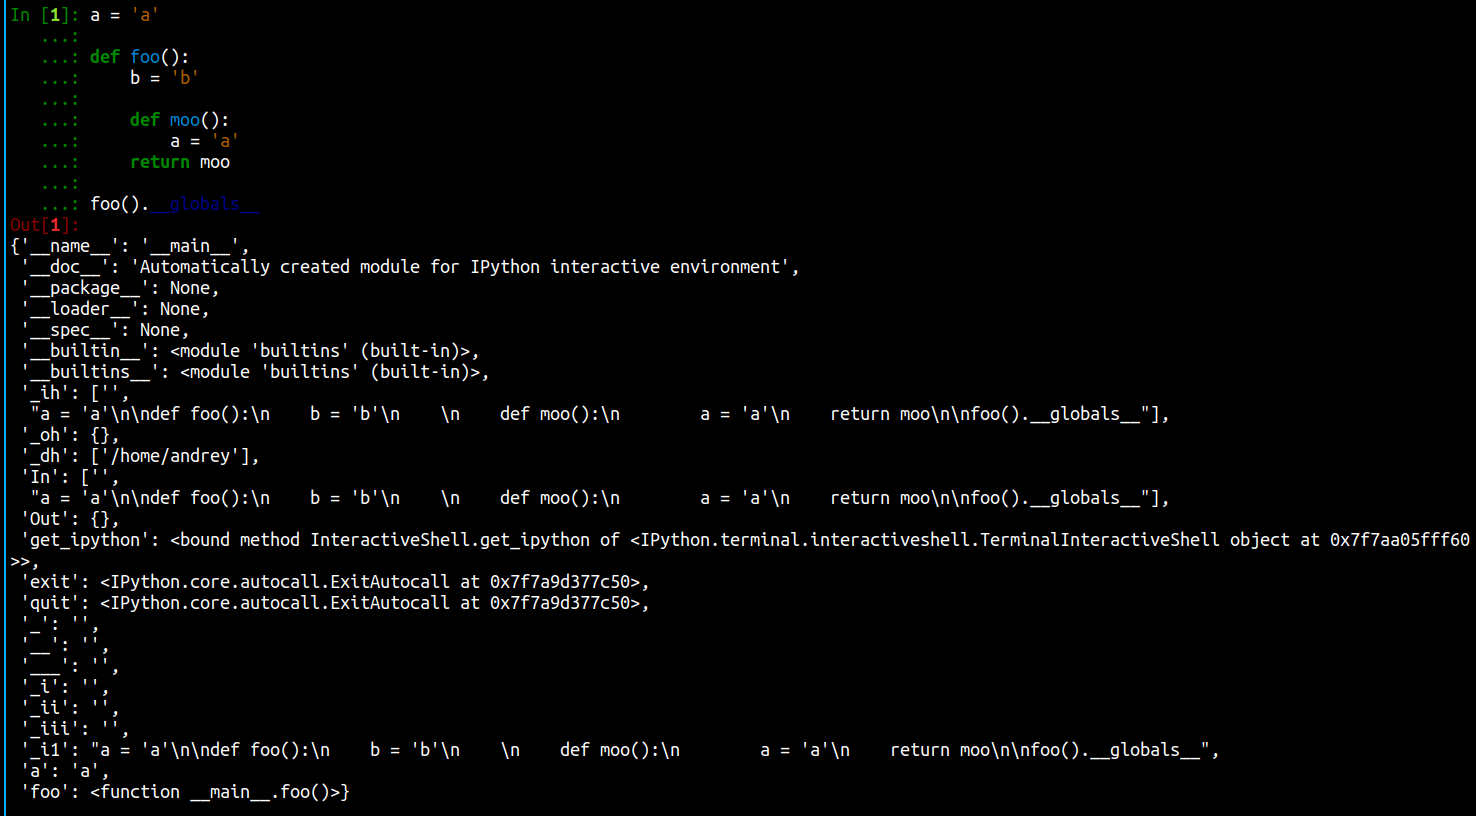

### SCOPES AKA ОБЛАСТИ ВИДИМОСТИ

Пространство имен – это соотнесение имен с объектами, желательно без конфликтов.

Namespace ~= dict
<img src='./images/namespaces.png' style='float: right;width:70%'>

<img src='./images/python_namespace.png' style='float:right;width:70%;height:70%'>

In [2]:
spam = 'spam and eggs'
eggs = spam
 
print(spam)  # spam and eggs
print(eggs)  # spam and eggs

print(id(spam)) 
print(id(eggs))

spam and eggs
spam and eggs
140714621322480
140714621322480


### Encapsulation and scoping

Замыкание – возможность функции использовать чужие переменные.

In [19]:
def spam():
    eggs = 'spam and eggs'    
    def cantine():
        print(eggs)
    cantine()
    
spam()


spam and eggs


In [21]:
def spam():
    print(eggs)
 
eggs = 'spam and eggs'
spam()  # spam and eggs

spam and eggs


In [1]:
def spam():
    eggs = 'spam and eggs'
    print(eggs)
 
spam()       # spam and eggs
print(eggs)  # raises a NameError exception

spam and eggs


NameError: name 'eggs' is not defined

### Инициализируя объект, мы также создаем новую область видимости.

In [21]:
del eggs

In [149]:
class Meal:
    eggs = 2
  
my_meal = Meal()
print(my_meal.eggs)    # 2
print(eggs)            # raises a NameError exception

2


NameError: name 'eggs' is not defined

###### Посмотреть, что у объекта в namespace == `__dict__`, можно через ` vars()`

In [56]:
vars(my_meal )

{'eggs': 2}

### LEGB

#### Поиск имени ведётся не более, чем в четырёх областях видимости: локальной, затем в объемлющей функции (если такая имеется), затем в глобальной и, наконец, во встроенной.

<img src='./images/python_namespaces_legb.jpg' style='float: right'>


<div style='float:left;width:40%;font-size:25px'>
<b>Local</b>– Names which are assigned within a function.

<b>Enclosing</b> – Names which are assigned in a closure (function in a function)

<b>Global</b> – Names which are assigned at the top-level of a module, for example on the top-level of your Python file

<b>Built-in</b> – Names which are standard Python built-ins, such as open, import, print, return, Exception</div>

<img src='./images/python_namespaces_code.jpg' style='float:right;width:60%' >


In [23]:
global_var = 0

def func():
    var = 'variable'
    
    def print_vars():
        inner_var = 1 
        print('inner_var', inner_var) # local
        print('var', var) # enclosing
        print('global_var', global_var) # global
        print('func', func)
    print_vars()

func()

inner_var 1
var variable
global_var 0
func <function func at 0x7fa18f705c80>


In [30]:
from dis import dis
dis(func) 

  4           0 LOAD_CONST               1 ('variable')
              2 STORE_DEREF              0 (var)

  6           4 LOAD_CLOSURE             0 (var)
              6 BUILD_TUPLE              1
              8 LOAD_CONST               2 (<code object print_vars at 0x7fe4a4352420, file "<ipython-input-29-9aac0c951ca1>", line 6>)
             10 LOAD_CONST               3 ('func.<locals>.print_vars')
             12 MAKE_FUNCTION            8
             14 STORE_FAST               0 (print_vars)

 12          16 LOAD_FAST                0 (print_vars)
             18 CALL_FUNCTION            0
             20 POP_TOP
             22 LOAD_CONST               0 (None)
             24 RETURN_VALUE

Disassembly of <code object print_vars at 0x7fe4a4352420, file "<ipython-input-29-9aac0c951ca1>", line 6>:
  7           0 LOAD_CONST               1 (1)
              2 STORE_FAST               0 (inner_var)

  8           4 LOAD_GLOBAL              0 (print)
              6 LOAD_CONST    

#### LEXING / TOKENIZING.

In [157]:
b = 6
def f1(a):
    print(a)
    print(b)

In [158]:
from dis import dis
dis(f1)

  3           0 LOAD_GLOBAL              0 (print)
              2 LOAD_FAST                0 (a)
              4 CALL_FUNCTION            1
              6 POP_TOP

  4           8 LOAD_GLOBAL              0 (print)
             10 LOAD_GLOBAL              1 (b)
             12 CALL_FUNCTION            1
             14 POP_TOP
             16 LOAD_CONST               0 (None)
             18 RETURN_VALUE


* Load global name print.
* Load local name a.
* Call print function with 1 positional argument. 
* Load global name b.
* Load constant, in which case there None.

#### Посмотреть, что в области видимости

In [159]:
glabal_var = 0

def func():
    var = 'variable'
    
    def print_vars(arg):
        inner_var = 1 
        print(locals()) # {'arg': 'argument', 'inner_var': 1}
        print(globals()) # {'__name__': '__main__', '__doc__' ..., 'glabal_var' : 0}
        
    print_vars('argument')

func()

{'arg': 'argument', 'inner_var': 1}
{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "print(bool([]))\n\nprint(bool([1]))\n\nprint(bool(0))\n\nprint(bool(''))\n\nprint(bool(b''))\n\nprint(bool('hello'))", 'smth = []\n\n# плохо\nif smth == []:\n    ...\nif len(smth) != 0:\n    ...\n\n    \n# лучше\nif not smth:\n    ...\n\n\nsome_counter = 0\nif smth == 0:\n    ...', 'pocket = {}\n\n# Плохо\nif key in pocket.keys():\n    ...\n\nif not pocket.get(key, False):\n    ...\n\n# Лучше\nif key in pocket:\n    ...\n\nif key not in pocket:\n    ...', "pocket = {}\n\n# Плохо\nif key in pocket.keys():\n    ...\n\nif not pocket.get('key', False):\n    ...\n\n# Лучше\nif key in pocket:\n    ...\n\nif key not in pocket:\n    ...", "pocket = {}\n\n# Плохо\nif key in pocket.keys():\n   

Функции в Python могут использовать переменные, определенные во внешних областях видимости. 

Важно помнить, что поиск переменных осуществляется во время исполнения функции, а не во время её объявления.

In [58]:
def f():
    print(i)

for i in range(5):
    f()

0
1
2
3
4


In [160]:
global_var = 0

def func():
    global_var = 1
    
print(global_var)
func()
print(global_var)

0
0


Для присваивания правило LEGB не работает

In [39]:
global_var = 0

def foo():
    global_var = global_var + 1

print(global_var)
foo()

UnboundLocalError: local variable 'global_var' referenced before assignment

Изменить стандартное поведение можно с помощью операторов nonlocal и global


### global

Чтобы присвоить некоторое значение переменной, определённой на высшем уровне​

программы, нужно воспользоваться оператором __global__.



In [44]:
global_var = 0

def foo():
    global global_var
    global_var = global_var + 1

print(global_var)
foo()
print(global_var)

0
1


### nonlocal

Nonlocal namespace – объявление функции внутри другой функции.


Чтобы присвоить новое значение переменной объявленной в функции выше, используем оператор nonlocal

In [47]:
def f1():
    a = 1
    b = 2
    
    def inner(): 
        nonlocal a
        a = a + b
        
    
    inner()
    print('local a is', a)
f1()

local a is 3


### Что нужно запомнить

1. В Python четыре области видимости: встроенная, глобальная, объемлющая и локальная.

2. Правило LEGB: поиск имени осуществляется от локальной к встроенной. При использовании операции присваивания имя считается локальным. 

3. Это поведение можно изменить с помощью операторов global и nonlocal.

#### Function annotation 

In [71]:
from typing import Union

def is_palindrome_very_much(s: Union[str, int],
                            variant: int,
                            key: None = None) -> bool:
    
    if variant == 1:
        return s == ''.join(reversed(s)) 
    if variant == 2:
        return s == s[::-1]
    return 'coose variant'

print(is_palindrome('madam', 1))
print(is_palindrome('madam', 2))

True
True


In [175]:
#  пасхалка

is_palindrome.__annotations__

{'s': typing.Union[str, int], 'variant': int, 'return': bool}

In [73]:
a: None = None
s: str = '123'

#### Naming и кое что еще

* Функция должна делать только одну вещь (логически)
* Функция-простыня на три экрана - БЕДА.
* Имя функции должно максимально коротко отражать то, что она делает
* Лучше длинно, но содержательно, чем коротко и туманно
* Лучше строить имя функции от глагола